In [1]:
import numpy as np

from keras.models import Sequential
from keras.models import load_model
from keras.models import model_from_json
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input

import matplotlib.pyplot as plt
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
#you can find the model at https://github.com/serengil/tensorflow-101/blob/master/model/facenet_model.json
model = model_from_json(open("C:/Users/IS96273/Desktop/facenet_model.json", "r").read())

#you can find the pre-trained weights at https://drive.google.com/file/d/1971Xk5RwedbudGgTIrGAL4F7Aifu7id1/view?usp=sharing
model.load_weights('C:/Users/IS96273/Desktop/facenet_weights.h5')

#both model and pre-trained weights are inspired from the work of David Sandberg (github.com/davidsandberg/facenet)
#and transformed by Sefik Serengil (sefiks.com)

In [11]:
#model.summary()

In [4]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(160, 160))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [5]:
def l2_normalize(x):
    return x / np.sqrt(np.sum(np.multiply(x, x)))

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [6]:
metric = "euclidean" #euclidean or cosine

threshold = 0
if metric == "euclidean":
    threshold = 0.35
elif metric == "cosine":
    threshold = 0.07

def verifyFace(img1, img2):
    #produce 128-dimensional representation
    img1_representation = model.predict(preprocess_image('C:/Users/IS96273/Desktop/trainset/%s' % (img1)))[0,:]
    img2_representation = model.predict(preprocess_image('C:/Users/IS96273/Desktop/trainset/%s' % (img2)))[0,:]
    
    if metric == "euclidean":
        img1_representation = l2_normalize(img1_representation)
        img2_representation = l2_normalize(img2_representation)

        euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
        print("euclidean distance (l2 norm): ",euclidean_distance)

        if euclidean_distance < threshold:
            print("verified... they are same person")
        else:
            print("unverified! they are not same person!")
            
    elif metric == "cosine":
        cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
        print("cosine similarity: ",cosine_similarity)

        if cosine_similarity < 0.07:
            print("verified... they are same person")
        else:
            print("unverified! they are not same person!")
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('C:/Users/IS96273/Desktop/trainset/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('C:/Users/IS96273/Desktop/trainset/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")

euclidean distance (l2 norm):  0.1944712
verified... they are same person


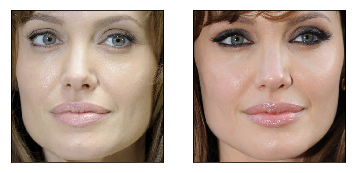

-----------------------------------------
euclidean distance (l2 norm):  0.26663294
verified... they are same person


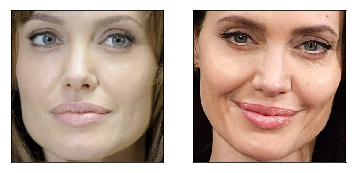

-----------------------------------------


In [7]:
#true positive
verifyFace("1.jpg", "5.jpg")
verifyFace("1.jpg", "7.jpg")

euclidean distance (l2 norm):  0.4257992
unverified! they are not same person!


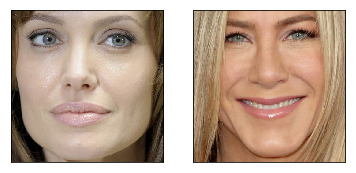

-----------------------------------------
euclidean distance (l2 norm):  0.42689604
unverified! they are not same person!


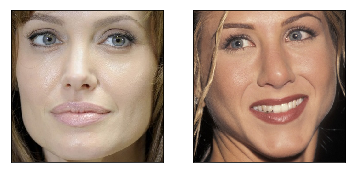

-----------------------------------------


In [8]:
#true negative
verifyFace("1.jpg", "8.jpg")
verifyFace("1.jpg", "10.jpg")

euclidean distance (l2 norm):  0.32390624
verified... they are same person


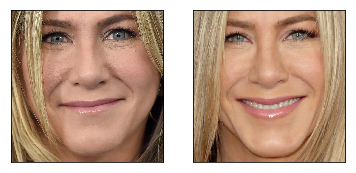

-----------------------------------------
euclidean distance (l2 norm):  0.30574152
verified... they are same person


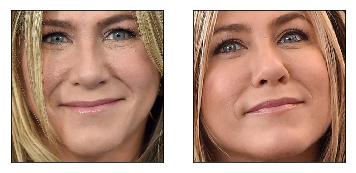

-----------------------------------------


In [10]:
#true positive
verifyFace("17.jpg", "8.jpg")
verifyFace("17.jpg", "9.jpg")